<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/Machine-Learning/Clustering/K-Means/01_KMeans_Clustering_project_to_target_the_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [0]:
!git clone https://github.com/noushadkhan01/my_methods

Cloning into 'my_methods'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 200 (delta 27), reused 0 (delta 0), pack-reused 153
Receiving objects: 100% (200/200), 51.99 KiB | 887.00 KiB/s, done.
Resolving deltas: 100% (114/114), done.


In [0]:
%cd my_methods
!ls

/content/my_methods
choose_best_classifier.py	      my_global_variables.py
choose_optimal_number_of_clusters.py  my_roc_curve.py
get_cross_validation.py		      print_model_results.py
my_cap_curve.py			      README.md
my_dummy_variable_2.py		      visualise_classifier_performance.py
my_dummy_variable_creator.py


In [0]:
from choose_optimal_number_of_clusters import choose_optimal_number_of_clusters

# DataPreprocessing

In [0]:
df = pd.read_csv('https://bit.ly/2FToHMJ')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**now we are choosing 2 columns only for better visualisation**

In [0]:
X = df.iloc[:, [3, 4]].values
X[:2]

array([[15, 39],
       [15, 81]])

# choosing optimal number of clusters in dataset
**by minimizing the WCSS (within-cluster sums of squares) and after apply elbow method and chose the no. of cluster where the decrease in WCSS is very less as compare to previous WCSS**

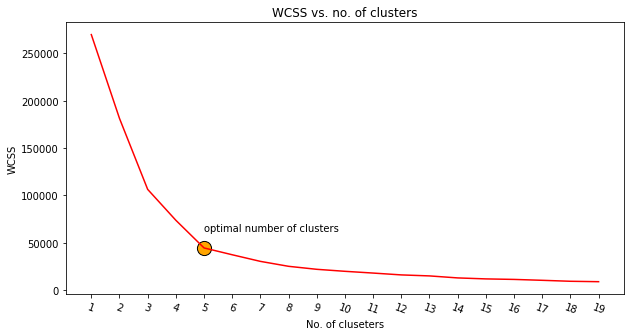

(5, 44448.45544793371)

In [0]:
choose_optimal_number_of_clusters(X, slope_threshold = .3, max_clusters = 20, step_size = 1)

**by elbow method we can see that optimal number of clusters are 5 because after this their is less decrease in WCSS**

In [0]:
optimal_clusters = 5

# Run model on optimal number of clusters

In [0]:
model = KMeans(n_clusters = optimal_clusters, n_init = 10)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## predict the cluster's of every Features

In [0]:
y_label = model.fit_predict(X)
y_label

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

### Unique clusters

In [0]:
pd.Series(y_label).unique()

array([3, 0, 4, 2, 1])

## Visualise

In [0]:
cluster_centers = model.cluster_centers_
cluster_centers

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852]])

In [0]:
import seaborn as sns

In [0]:
sns.set_style('whitegrid')

In [0]:
def visualise_2d_dataset(model = None, x = None, optimal_clusters = None):
  if not model:
    if not optimal_clusters:
      raise ValueError('Please Provide the number of optimal Clusters')
    else:
      model = KMeans(n_clusters = optimal_clusters, n_init = 10)
      model.fit(x)
  if model:
      y_label = model.fit_predict(x)
      plt.figure(figsize = (10, 7))
      plt.scatter(X[:, 0], X[:, 1], c = y_label, cmap = 'coolwarm', edgecolors = 'black', linewidths = 1, alpha = 1, s = 150)
      plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s = 300, c = 'red', label = 'Centroids', edgecolors = 'black', alpha = .7)
      plt.title(f'Visualisation of {optimal_clusters} clusters')
      plt.xlabel('Annual Income (k$)',fontsize =  'large')
      plt.ylabel('Spending Score (1 - 100)',fontsize =  'large')
      plt.legend(bbox_to_anchor = (1.2, 1))
      plt.show()

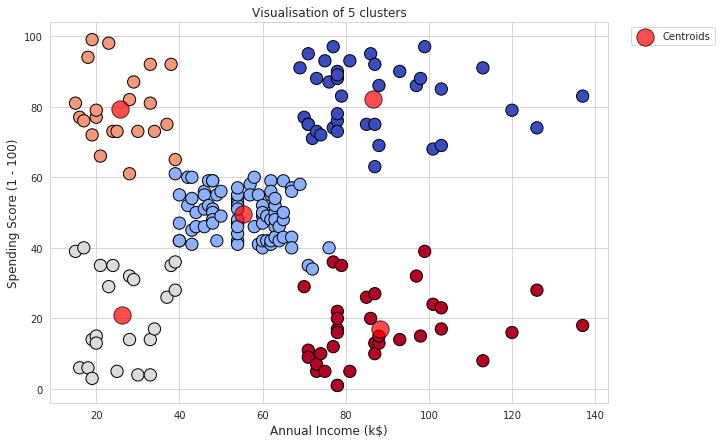

In [0]:
visualise_2d_dataset(optimal_clusters = 5, x = X)

# Conclustion of Project

**By visualising this graph we can conclude that is**
- cluster 1 (**lower left**) having **Low Income, Low Spending**                  ------->**Sensible Customers**
-  cluster 2 (**lower right**) having **High Income, Low Spending**  ------>**Careful Customers**
-  cluster 3 (**Center**) having **Medium Income, Medium Spending**------>**Standard Customers**
-  cluster4 (**Upper Left**) having **Low income, High Spending**             ------>**Carless Customers**
-  
cluster 5 (**Upper Right**) having **High Income, High Spending**------>**Target Customers**

#KMeans fit_trasnform

In [0]:
from sklearn.datasets import make_blobs

In [60]:
data = make_blobs(n_samples = 300, n_features = 2, centers = 2)
data, centers = data[0],data[1]
data[:2]

array([[-0.22408507, -6.26030372],
       [-0.54935289, -5.27470929]])

In [61]:
data.shape

(300, 2)

In [62]:
train_data = data[:250]
train_data.shape

(250, 2)

In [63]:
test_data = data[250:]
test_data.shape

(50, 2)

In [64]:
#fit transform features
model = KMeans(2)
train_data_tf = model.fit_transform(train_data)
train_data_tf[:2]

array([[1.76330771, 1.28325777],
       [1.20110403, 1.2523939 ]])

In [65]:
test_data_tf = model.transform(test_data)
test_data_tf[:2]

array([[2.05449064, 0.73991937],
       [1.8377244 , 1.79234872]])

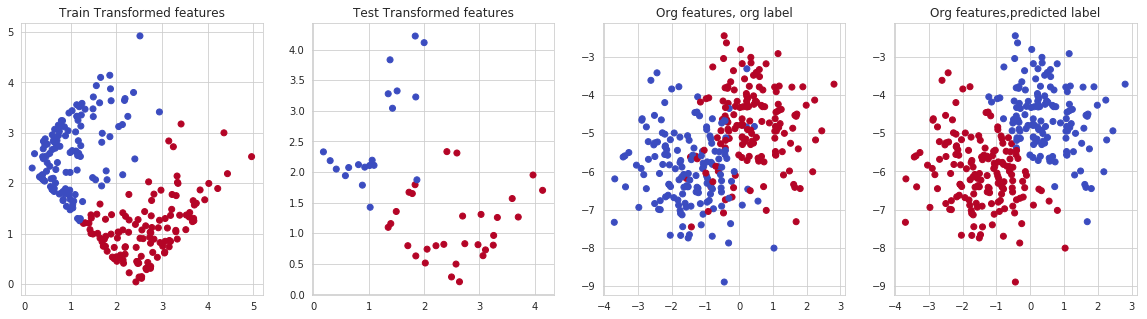

In [68]:
plt.figure(figsize = (20, 5))
plt.subplot(1, 4, 1)
plt.title('Train Transformed features')
plt.scatter(train_data_tf[:, 0], train_data_tf[: , 1], c = model.predict(train_data), cmap = 'coolwarm')
plt.subplot(1, 4, 2)
plt.title('Test Transformed features')
plt.scatter(test_data_tf[:, 0], test_data_tf[: , 1], c = model.predict(test_data), cmap = 'coolwarm')
plt.subplot(1, 4, 3)
plt.title('Org features, org label')
plt.scatter(data[:, 0], data[:, 1], c = centers, cmap = 'coolwarm')
plt.subplot(1, 4, 4)
plt.title('Org features,predicted label')
plt.scatter(data[:, 0], data[:, 1], c = KMeans(2).fit_predict(data), cmap = 'coolwarm')
plt.show()